## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll further investigate how to tune your personal logistic regression implementation, as well as that of sci-kit learn in order to produce better models.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, you were able to verify your manual logistic regression model output using sci-kit learn. However, that model did not include an intercept or any regularization. In this investigative lab, you will analyze the impact these two tuning parameters.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implement a standard train-test split.  
**For consistency of results, use random_state=17.**

In [3]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [4]:
# Initial model
def sigmoid(x):
    x = np.array(x)
    return 1/(1 + np.e**(-1*x))

def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights = initial_weights
    #Create a for loop of iterations
    for iteration in range(max_iterations):
        #Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        #Calculate the gradient 
        #As we saw in the previous lab, calculating the gradient is often the most difficult task.
        #Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        #For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        #Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
    #Return finalized Weights
    return weights

weights = grad_desc(X_train, y_train, 50000, 0.001)

## Now use your algorithm to make [probability] predictions on the test set

In [32]:
#predict test
y_hat_test = sigmoid(np.dot(X_test, weights))

## Create an ROC curve for your predictions

In [33]:
#ROC 
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresh = roc_curve(y_test, y_hat_test)

AUC: 0.8996515679442508


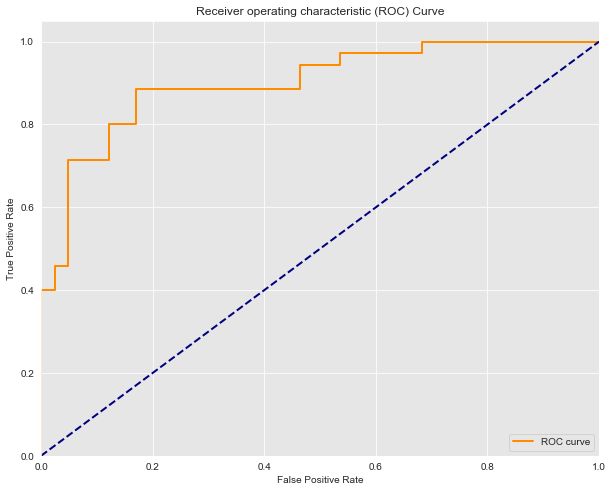

In [34]:
import seaborn as sns
%matplotlib inline


#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.yticks([np.linspace(0,1,num=20)])
#plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

In [9]:
y_hat_train = sigmoid(np.dot(X_train, weights))
fpr2, tpr2, thresh2 = roc_curve(y_train, y_hat_train)


AUC test: 0.8996515679442508
AUC train: 0.9291038858049168


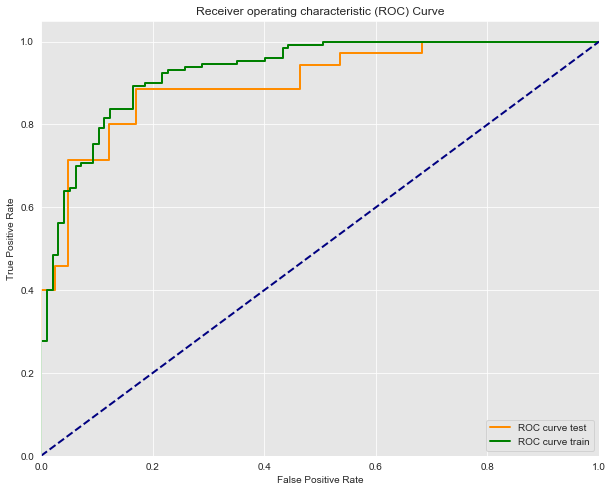

In [45]:
# test and train ROC

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC test: {}'.format(auc(fpr, tpr)))
print('AUC train: {}'.format(auc(fpr2, tpr2)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve test')

plt.plot(fpr2, tpr2, color='green',
         lw=lw, label='ROC curve train')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.yticks([i/20.0 for i in range(21)])
#plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

In [11]:
test_predictions = [i>=0.5 for i in y_hat_test]

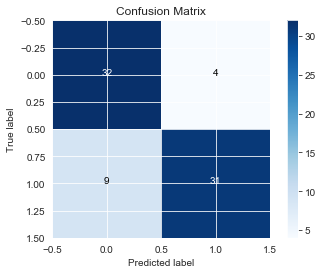

In [21]:
# confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_predictions, y_test)

plt.imshow(cnf_matrix,interpolation='nearest', cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
#plt.xticks(tick_marks, class_names, rotation=45)
#plt.yticks(tick_marks, class_names)
plt.xticks=np.arange(cnf_matrix.shape[1],1)
plt.yticks=np.arange(cnf_matrix.shape[0],1)
#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [22]:
# scikit learn initial log model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C=1e16)
logmod = logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Create an ROC Curve for the sci-kit learn model

AUC: 0.8996515679442508


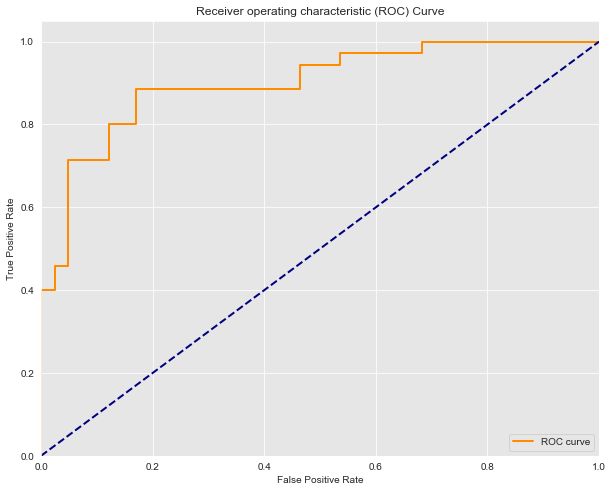

In [46]:
y_hat_test = logmod.decision_function(X_test)
fpr, tpr, thresh = roc_curve(y_test, y_hat_test)

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.yticks([i/20.0 for i in range(21)])
#plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## As before add an ROC curve to the graph for the train set as well

AUC test: 0.8996515679442508
AUC train: 0.9291038858049168


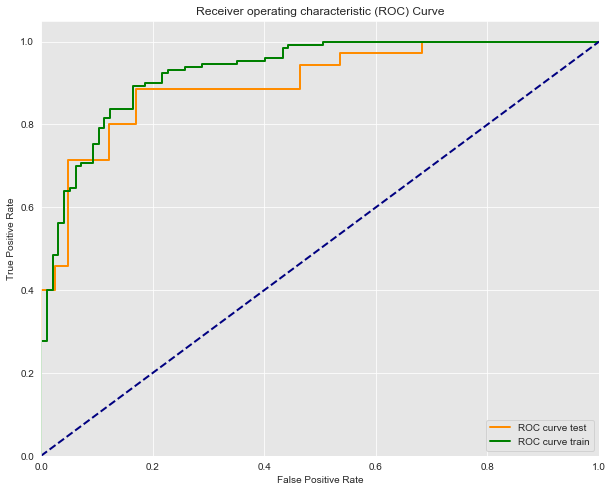

In [47]:
#Your code here
y_hat_train = logmod.decision_function(X_train)
fpr2, tpr2, thresh2 = roc_curve(y_train, y_hat_train)
print('AUC test: {}'.format(auc(fpr, tpr)))
print('AUC train: {}'.format(auc(fpr2, tpr2)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve test')

plt.plot(fpr2, tpr2, color='green',
         lw=lw, label='ROC curve train')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.yticks([i/20.0 for i in range(21)])
#plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

In [39]:
logreg = LogisticRegression(fit_intercept = True, C=1e16)
logreg.fit(X_train, y_train)
y_hat_test = logreg.decision_function(X_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_hat_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC test: 0.8996515679442508
AUC train: 0.9291038858049168
AUC test-intercept: 0.8989547038327527


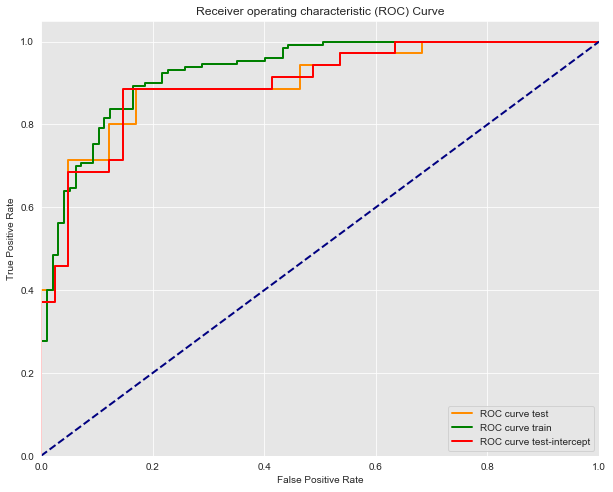

In [43]:
# Your code here
print('AUC test: {}'.format(auc(fpr, tpr)))
print('AUC train: {}'.format(auc(fpr2, tpr2)))
print('AUC test-intercept: {}'.format(auc(fpr3, tpr3)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve test')

plt.plot(fpr2, tpr2, color='green',
         lw=lw, label='ROC curve train')
plt.plot(fpr3, tpr3, color='red',
         lw=lw, label='ROC curve test-intercept')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.yticks([i/20.0 for i in range(21)])
#plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

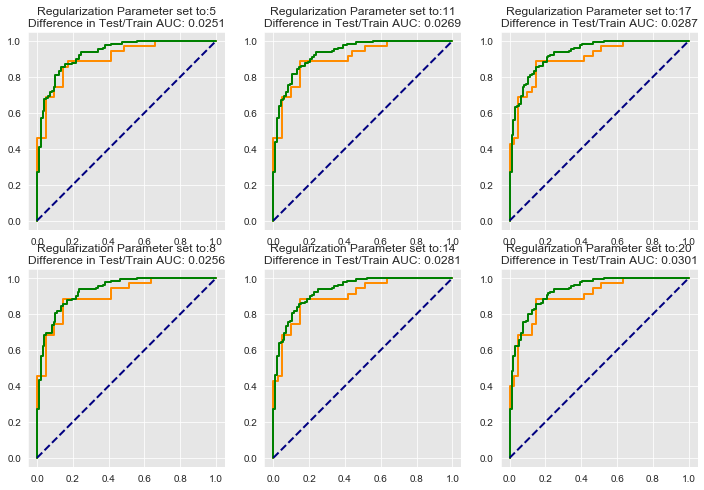

In [61]:
# Your code here
n = 0
fig, axs = plt.subplots(2, 3, figsize=(12,8))
for j in range(3):
    for i in range(2):
        logreg = LogisticRegression(fit_intercept = True, C=5+n)
        logreg.fit(X_train, y_train)
        ax = axs[i,j]
        y_hat_test = logreg.decision_function(X_test)
        fpr, tpr, thresh = roc_curve(y_test, y_hat_test)
        y_hat_train = logreg.decision_function(X_train)
        fpr2, tpr2, thresh = roc_curve(y_train, y_hat_train)
        
        #print('AUC test: {}'.format(auc(fpr, tpr)))
        #print('AUC train: {}'.format(auc(fpr2, tpr2)))

        test_auc = auc(fpr, tpr)
        train_auc = auc(fpr2, tpr2)
        auc_diff = round(train_auc - test_auc, 4)
        
        ax.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve test')

        ax.plot(fpr2, tpr2, color='green',
                 lw=lw, label='ROC curve train')
        ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        ax.set_title(f'Regularization Parameter set to:{n+5}\nDifference in Test/Train AUC: {auc_diff}')
        n += 3


## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

#### Higher regulation seems to lead to overfitting.

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.